## Homework-3: MNIST Classification with ConvNet

### **Deadline: 2020.04.07 11:59:00 AM**

### In this homework, you need to
- #### implement forward and backward for ConvLayer (`layers/conv_layer.py`)
- #### implement forward and backward for PoolingLayer (`layers/pooling_layer.py`)
- #### implement forward and backward for DropoutLayer (`layers/dropout_layer.py`)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [1, 28, 28])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [0]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))
x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyperparameters
You can modify hyperparameters by yourself.

In [0]:
batch_size = 100
max_epoch = 10
init_std = 0.01

learning_rate = 0.001
weight_decay = 0.005

disp_freq = 50

## Criterion and Optimizer

In [0]:
from criterion import SoftmaxCrossEntropyLossLayer
from optimizer import SGD

criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate, weight_decay)

## ConvNet

In [0]:
from layers import FCLayer, ReLULayer, ConvLayer, MaxPoolingLayer, ReshapeLayer

convNet = Network()
convNet.add(ConvLayer(1, 8, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ConvLayer(8, 16, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ReshapeLayer((batch_size, 16, 7, 7), (batch_size, 784)))
convNet.add(FCLayer(784, 128))
convNet.add(ReLULayer())
convNet.add(FCLayer(128, 10))

In [11]:
# Train
convNet.is_training = True
convNet, conv_loss, conv_acc = train(convNet, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.

Epoch [0][10]	 Batch [0][550]	 Training Loss 15.1622	 Accuracy 0.1400
Epoch [0][10]	 Batch [50][550]	 Training Loss 3.1455	 Accuracy 0.2427
Epoch [0][10]	 Batch [100][550]	 Training Loss 2.4816	 Accuracy 0.3293
Epoch [0][10]	 Batch [150][550]	 Training Loss 2.1578	 Accuracy 0.3883
Epoch [0][10]	 Batch [200][550]	 Training Loss 1.9369	 Accuracy 0.4371
Epoch [0][10]	 Batch [250][550]	 Training Loss 1.7740	 Accuracy 0.4744
Epoch [0][10]	 Batch [300][550]	 Training Loss 1.6419	 Accuracy 0.5078
Epoch [0][10]	 Batch [350][550]	 Training Loss 1.5440	 Accuracy 0.5336
Epoch [0][10]	 Batch [400][550]	 Training Loss 1.4580	 Accuracy 0.5559
Epoch [0][10]	 Batch [450][550]	 Training Loss 1.3867	 Accuracy 0.5758
Epoch [0][10]	 Batch [500][550]	 Trainin

In [12]:
# Test
convNet.is_training = False
test(convNet, criterion, data_test, batch_size, disp_freq)

Testing...

The test accuracy is 0.9329.



## Plot

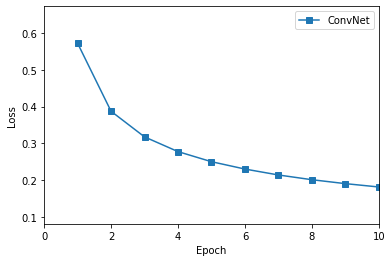

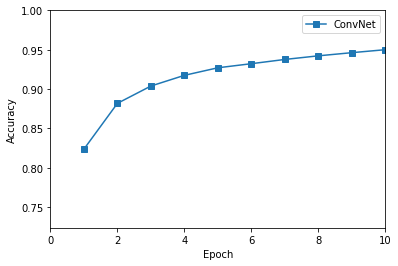

In [13]:
plot_loss_and_acc({'ConvNet': [conv_loss, conv_acc]})

### ~~You have finished homework3, congratulations!~~  

**Next, according to the requirements (4):**
### **You need to implement the Dropout layer and train the network again.**

Epoch [0][10]	 Batch [0][550]	 Training Loss 3.8838	 Accuracy 0.1400
Epoch [0][10]	 Batch [50][550]	 Training Loss 2.6656	 Accuracy 0.1588
Epoch [0][10]	 Batch [100][550]	 Training Loss 2.4908	 Accuracy 0.1812
Epoch [0][10]	 Batch [150][550]	 Training Loss 2.3728	 Accuracy 0.2031
Epoch [0][10]	 Batch [200][550]	 Training Loss 2.2739	 Accuracy 0.2311
Epoch [0][10]	 Batch [250][550]	 Training Loss 2.1903	 Accuracy 0.2559
Epoch [0][10]	 Batch [300][550]	 Training Loss 2.1129	 Accuracy 0.2834
Epoch [0][10]	 Batch [350][550]	 Training Loss 2.0534	 Accuracy 0.3058
Epoch [0][10]	 Batch [400][550]	 Training Loss 1.9938	 Accuracy 0.3269
Epoch [0][10]	 Batch [450][550]	 Training Loss 1.9427	 Accuracy 0.3456
Epoch [0][10]	 Batch [500][550]	 Training Loss 1.8956	 Accuracy 0.3636

Epoch [0]	 Average training loss 1.8496	 Average training accuracy 0.3809
Epoch [0]	 Average validation loss 1.2970	 Average validation accuracy 0.5990

Epoch [1][10]	 Batch [0][550]	 Training Loss 1.2196	 Accuracy 0.6600

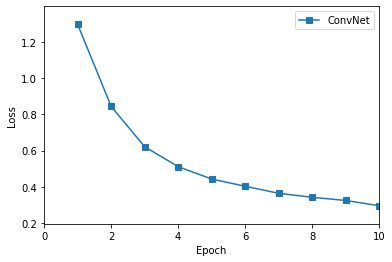

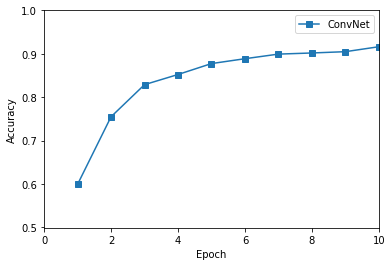

In [17]:
from layers import DropoutLayer

# set hyperparameters
batch_size = 100
max_epoch = 10
init_std = 0.01
learning_rate = 0.001
weight_decay = 0.
disp_freq = 50

# build your network
convNet = Network()
convNet.add(ConvLayer(1, 8, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ConvLayer(8, 16, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ReshapeLayer((batch_size, 16, 7, 7), (batch_size, 784)))
convNet.add(FCLayer(784, 128))
convNet.add(ReLULayer())
convNet.add(DropoutLayer(0.2))
convNet.add(FCLayer(128, 10))

# training
convNet.is_training = True
convNet, conv_loss, conv_acc = train(convNet, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

# testing
convNet.is_training = False
test(convNet, criterion, data_test, batch_size, disp_freq)

# plot
plot_loss_and_acc({'ConvNet': [conv_loss, conv_acc]})